In [1]:
import neptune as neptune
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker

from misc import get_neptune_table, get_activations, plot_module, get_steps_from_first_run, pivot_dict, plot_loss_vs_lr

In [2]:
tags = ['muP_MoE', 'test_grid']

df = get_neptune_table(tags)
print(df.shape)

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (45, 608)
(45, 608)


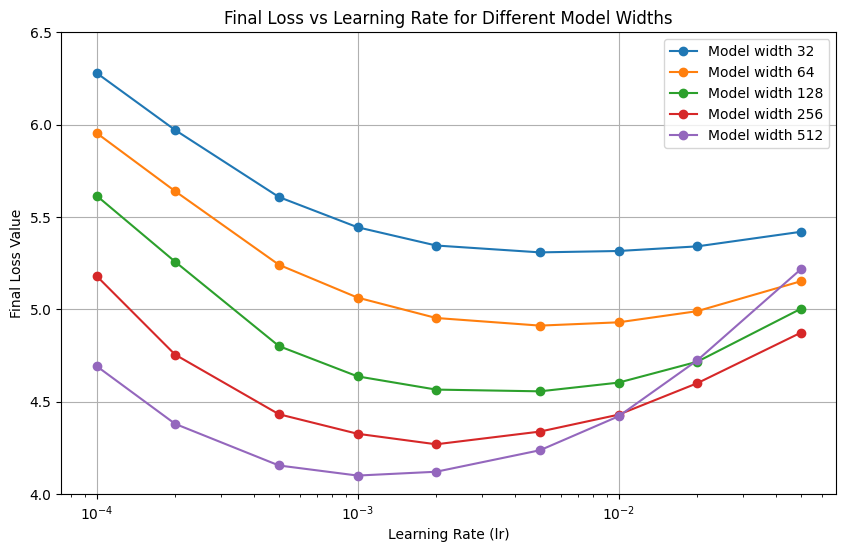

In [3]:
plot_loss_vs_lr(df, (4, 6.5))

In [4]:
tags = ['muP_MoE', 'norm_plot_3']

df = get_neptune_table(tags)
print(df.shape)

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (4, 247)
(4, 247)


In [5]:
act_dict = get_activations(df, 'mean')
print(act_dict)


run ID: LLMRANDOM-23654
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23654
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-23653
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23653
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-23620
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23620
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-23608
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23608
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
{'LLMRANDOM-23654': {'dmodel': 256, 0: {'attn':         step      value               timestamp
0        0.0   0.296875 2024-11-29 10:20:43.727
1      100.0   2.515625 2024-11-29 10:20:51.599
2      200.0   6.218750 2024-11-29 10:20:59.945
3      300.0   8.937500 2024-11-29 10:21:07.653
4      400.0  13.375000 2024-11-29 10:21:15.512
..       ...        ...                     ...


In [6]:
steps = get_steps_from_first_run(act_dict)
layer_num = 'UNKNOWN'
module='embedding'
pivoted_dict = pivot_dict(
    activations_dict=act_dict,
    steps=steps,
    dmodels=[32, 64, 128, 256, 512],
    layer_num=layer_num,
    module=module,
)

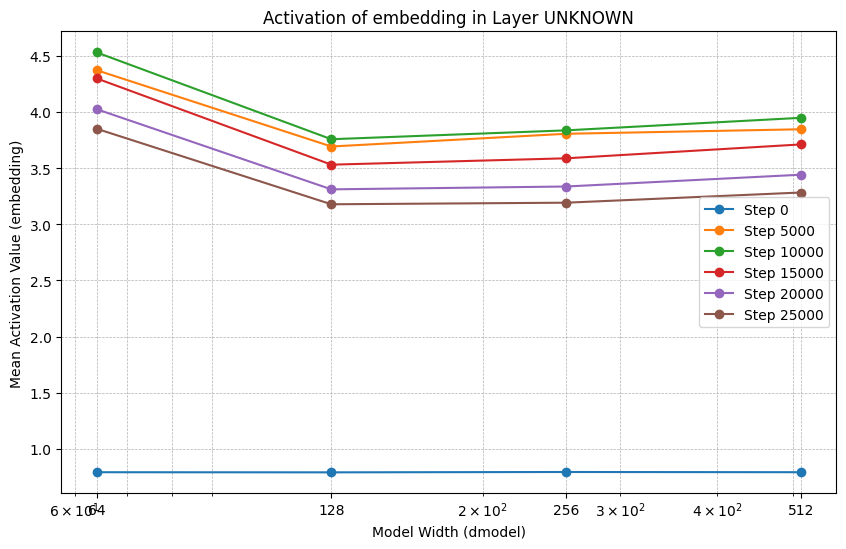

In [7]:
plot_module(
    pivoted_dict=pivoted_dict,
    module_keyword=module,
    layer_num=layer_num,
    step_interval=5000,
)

In [8]:
import torch

def truncated_normal_(tensor, mean=0.0, std=1.0, lower=-2.0, upper=2.0):
    """
    Initializes a tensor with truncated normal distribution.

    Args:
        tensor (torch.Tensor): Tensor to be initialized.
        mean (float): Mean of the normal distribution.
        std (float): Standard deviation of the normal distribution.
        lower (float): Lower bound of truncation.
        upper (float): Upper bound of truncation.
    """
    # Calculate the bounds in standard deviations
    lower_bound = (lower - mean) / std
    upper_bound = (upper - mean) / std
    
    # Use torch's trunc_normal_ if available
    with torch.no_grad():
        size = tensor.shape
        truncated = torch.fmod(
            torch.normal(mean=mean, std=std, size=size),
            upper_bound - lower_bound
        )
        tensor.copy_(torch.clamp(truncated, min=lower, max=upper))

# Example usage
v = 100
d = 5
x = torch.zeros(v)
x[5] += 1.0
print(f'x[:10] = {x[:10]}')
matrix = torch.empty(v, d)  # Create an empty 5x5 tensor
std_base = 1.0
truncated_normal_(matrix, mean=0.0, std=std_base, lower=-2.0, upper=2.0)
print(f'base norm: {torch.norm(x@matrix)/np.sqrt(d)}\tstd: {torch.std(x@matrix)}')

e = 1000
# x = torch.rand(v)
matrix = torch.empty(v, e)  # Create an empty 5x5 tensor
m_d = e / d
truncated_normal_(matrix, mean=0.0, std=std_base, lower=-2.0, upper=2.0)
# matrix *= (1 / np.sqrt(m_d))
print(f'extrpl norm: {torch.norm(x@matrix)/np.sqrt(e)}\tstd: {torch.std(x@matrix)}')


x[:10] = tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
base norm: 0.9204328060150146	std: 0.8772127628326416
extrpl norm: 0.9589369297027588	std: 0.9593961834907532
